In [8]:
import numpy as np
import math

## Cost Function (Root Mean Squared Error)

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$ 

In [2]:
def rmse(x,y,w,b) -> int:
    '''
        x: Here X is value of feature
        y: The value (from data) wrt to x
        w: It is a weight of x
        b: It is a bias.
    '''
    cost=0
    for i in range(len(x)):
        y_predicted=w*x[i]+b
        cost+=(y_predicted-y[i])**2
    cost/=2*len(x)
    return cost

##        Computing gradient with the respect of w and b
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

In [5]:
def compute_gradient(x,y,w,b):
    '''
        In this we are going to compute partial derivative wrt to w and b
        x: Here X is value of feature
        y: The value (from data) wrt to x
        w: It is a weight of x
        b: It is a bias.
    '''

    d_w=0
    d_b=0
    m=len(x)

    for i  in range(m):
        y_predicted=w*x[i]+b
        compute=y_predicted-y[i]
        d_w+=(compute)*x[i]
        d_b+=compute
    d_w/=m
    d_b/=m
    return d_w,d_b

## Gradient Descent

The gradient is defined as:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

In [12]:
def gradient_descent(x,y,w_in,b_in,alpha,num_iters):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    J_history = []
    P_history = []
    w = w_in
    b = b_in

    for epoch in range(num_iters):
        # Calculating Gradients
        d_w,d_b=compute_gradient(x,y,w,b)

        # Updating Parameters
        w-=alpha*d_w
        b-=alpha*d_b

        # Error at current epoch
        cost=rmse(x,y,w,b)
        
        # Storing History
        J_history.append(cost)
        P_history.append([w,b])

        if epoch% math.ceil(num_iters/10) == 0:
          print(f"Iteration {epoch:4}: Cost {J_history[-1]:0.2e} ",
                f"dj_dw: {d_w: 0.3e}, dj_db: {d_b: 0.3e}  ",
                f"w: {w: 0.3e}, b:{b: 0.5e}")
    return w,b,J_history,P_history
          
 


## Training 

In [25]:
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

w=0
b=0
w,b,J_history,P_history=gradient_descent(x,y,w,b,0.01,10000)



Iteration    0: Cost 1.71e+01  dj_dw: -2.200e+01, dj_db: -6.000e+00   w:  2.200e-01, b: 6.00000e-02
Iteration 1000: Cost 8.14e-04  dj_dw: -4.437e-03, dj_db:  1.602e-02   w:  1.974e+00, b: 9.45930e-02
Iteration 2000: Cost 2.76e-05  dj_dw: -8.171e-04, dj_db:  2.950e-03   w:  1.995e+00, b: 1.74209e-02
Iteration 3000: Cost 9.37e-07  dj_dw: -1.505e-04, dj_db:  5.433e-04   w:  1.999e+00, b: 3.20836e-03
Iteration 4000: Cost 3.18e-08  dj_dw: -2.771e-05, dj_db:  1.001e-04   w:  2.000e+00, b: 5.90875e-04
Iteration 5000: Cost 1.08e-09  dj_dw: -5.104e-06, dj_db:  1.843e-05   w:  2.000e+00, b: 1.08820e-04
Iteration 6000: Cost 3.66e-11  dj_dw: -9.400e-07, dj_db:  3.394e-06   w:  2.000e+00, b: 2.00410e-05
Iteration 7000: Cost 1.24e-12  dj_dw: -1.731e-07, dj_db:  6.250e-07   w:  2.000e+00, b: 3.69090e-06
Iteration 8000: Cost 4.21e-14  dj_dw: -3.188e-08, dj_db:  1.151e-07   w:  2.000e+00, b: 6.79742e-07
Iteration 9000: Cost 1.43e-15  dj_dw: -5.872e-09, dj_db:  2.120e-08   w:  2.000e+00, b: 1.25186e-07


## Plotting

In [31]:
import matplotlib.pyplot as plt

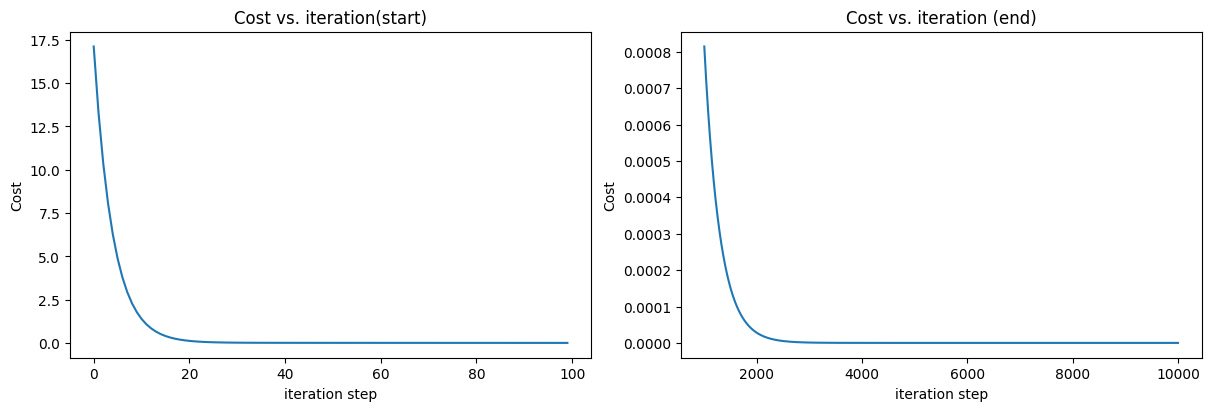

In [32]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_history[:100])
ax2.plot(1000 + np.arange(len(J_history[1000:])), J_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

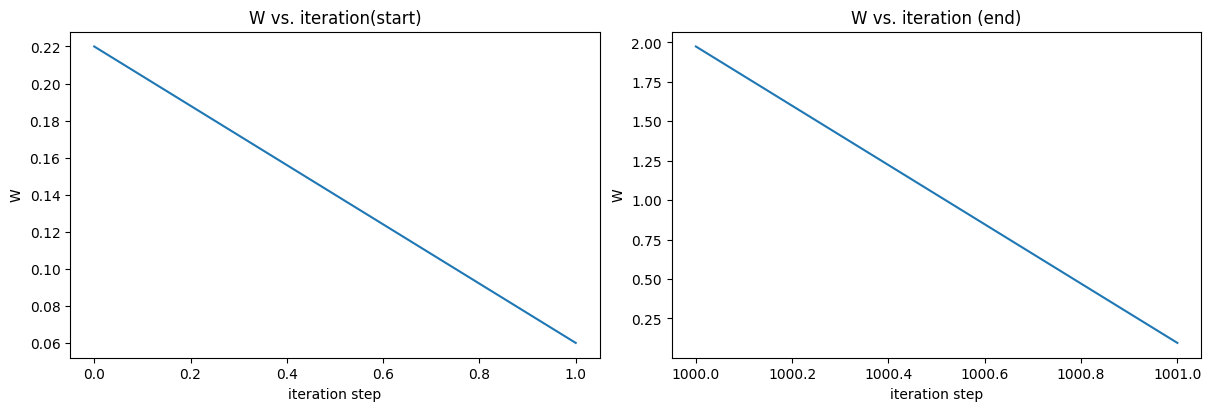

In [34]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(P_history[:100][0])
ax2.plot(1000 + np.arange(len(P_history[1000:][0])), P_history[1000:][0])
ax1.set_title("W vs. iteration(start)");  ax2.set_title("W vs. iteration (end)")
ax1.set_ylabel('W')            ;  ax2.set_ylabel('W') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

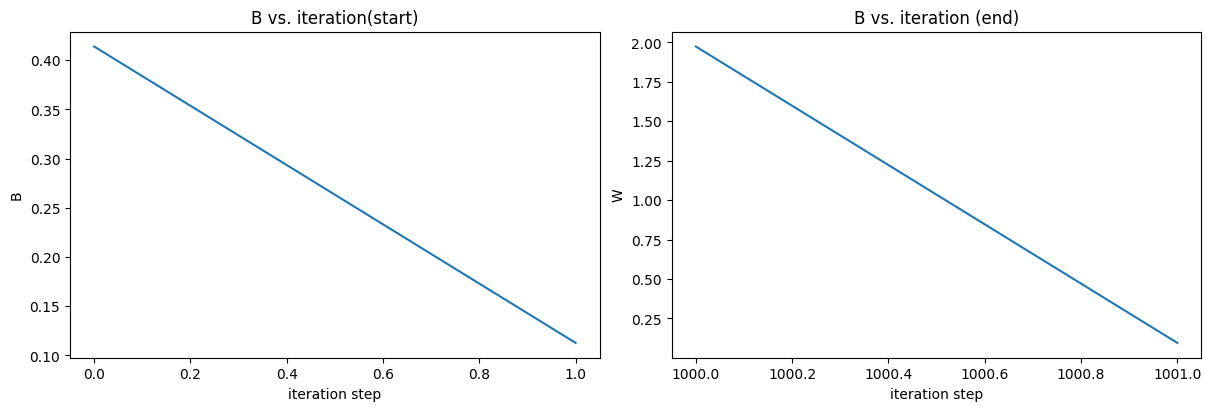

In [35]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(P_history[:100][1])
ax2.plot(1000 + np.arange(len(P_history[1000:][1])), P_history[1000:][1])
ax1.set_title("B vs. iteration(start)");  ax2.set_title("B vs. iteration (end)")
ax1.set_ylabel('B')            ;  ax2.set_ylabel('W') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()